In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import plotly.express as px

In [2]:
train_data = pd.read_excel('train.xlsx')
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
test_data = pd.read_excel('test.xlsx')

In [4]:
train_data.shape

(10683, 11)

In [5]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
train_data.dropna(inplace=True)

In [7]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [8]:
def convert_datetime(col):
    train_data[col] = pd.to_datetime(train_data[col])

In [9]:
for i in ['Date_of_Journey','Arrival_Time','Dep_Time']:
    convert_datetime(i)

In [10]:
train_data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [11]:
train_data['Journey_day'] = train_data['Date_of_Journey'].dt.day
train_data['Journey_month'] = train_data['Date_of_Journey'].dt.month
train_data['Journey_year'] = train_data['Date_of_Journey'].dt.year

In [12]:
train_data['Journey_year'].unique()

array([2019])

In [13]:
## dropping date of journey year since all data is from 2019
train_data.drop(['Journey_year'], axis = 1, inplace = True)

In [14]:
# preprocessing time columns that look faulty, but time looks okay 
def extract_hour(df,col):
    df[col + "_hour"] = df[col].dt.hour
def extract_minute(df,col):
    df[col + "_minute"] = df[col].dt.minute
def drop_column(df, col):
    df.drop(col, axis=1, inplace=True)

In [15]:
extract_hour(train_data,"Dep_Time")
extract_minute(train_data,"Dep_Time")
drop_column(train_data,"Dep_Time")

In [16]:
extract_hour(train_data,"Arrival_Time")
extract_minute(train_data,"Arrival_Time")
drop_column(train_data,"Arrival_Time")

In [17]:
def process_duration(df,col):
    l = []
    for row in df[col]:
        x = row.split()
        if (len(x) == 2):
            x[0] = x[0].replace("h","")
            x[1] = x[1].replace("m","")
            l.append(int(x[0])* 60 + int(x[1]))
        else:
            if ("h" in x[0]):
                x[0] = x[0].replace("h","")
                l.append(int(x[0]) * 60)
            else:
                x[0] = x[0].replace("m","")
                l.append(int(x[0]))
                
    return l

In [18]:
train_data['Duration']=process_duration(train_data,"Duration")

In [19]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,3,1,16,50,21,35


In [20]:
#preprocessing total_stops

In [21]:
train_data['Total_Stops']=train_data['Total_Stops'].apply(lambda x: x.replace("stop",""))
train_data['Total_Stops']=train_data['Total_Stops'].apply(lambda x: x.replace("s",""))
train_data['Total_Stops']=train_data['Total_Stops'].apply(lambda x: x.replace("non-","0"))
train_data['Total_Stops'] = pd.to_numeric(train_data['Total_Stops'])

In [22]:
#preprocessing routes

In [23]:
train_data['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [24]:
train_data['Route'].apply(lambda x: len(x.split(" → "))).describe()

count    10682.000000
mean         2.824190
std          0.675229
min          2.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          6.000000
Name: Route, dtype: float64

In [25]:
#most flights have 3 cities in the route. max is 6. extracting upto 4 cities in the route.
train_data['Route_1']=train_data['Route'].str.split(" → ").str[0]
train_data['Route_2']=train_data['Route'].str.split(" → ").str[1]
train_data['Route_3']=train_data['Route'].str.split(" → ").str[2]
train_data['Route_4']=train_data['Route'].str.split(" → ").str[3]
train_data.drop(['Route'], axis=1, inplace=True)
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Route_1,Route_2,Route_3,Route_4
0,IndiGo,2019-03-24,Banglore,New Delhi,170,0,No info,3897,24,3,22,20,1,10,BLR,DEL,NaN,NaN
1,Air India,2019-01-05,Kolkata,Banglore,445,2,No info,7662,5,1,5,50,13,15,CCU,IXR,BBI,BLR
2,Jet Airways,2019-09-06,Delhi,Cochin,1140,2,No info,13882,6,9,9,25,4,25,DEL,LKO,BOM,COK
3,IndiGo,2019-12-05,Kolkata,Banglore,325,1,No info,6218,5,12,18,5,23,30,CCU,NAG,BLR,NaN
4,IndiGo,2019-01-03,Banglore,New Delhi,285,1,No info,13302,3,1,16,50,21,35,BLR,NAG,DEL,NaN


In [26]:
train_data.isnull().sum()

Airline                   0
Date_of_Journey           0
Source                    0
Destination               0
Duration                  0
Total_Stops               0
Additional_Info           0
Price                     0
Journey_day               0
Journey_month             0
Dep_Time_hour             0
Dep_Time_minute           0
Arrival_Time_hour         0
Arrival_Time_minute       0
Route_1                   0
Route_2                   0
Route_3                3491
Route_4                9116
dtype: int64

In [27]:
train_data["Route_3"].fillna('None', inplace = True)
train_data["Route_4"].fillna('None', inplace = True)

In [28]:
train_data['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [29]:
train_data['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [30]:
train_data['Destination'] = np.where(train_data['Destination']=='New Delhi','Delhi',train_data['Destination'])

In [31]:
train_data['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [32]:
train_data['Additional_Info'] = np.where(train_data['Additional_Info']=='No Info','No info',train_data['Additional_Info'])

In [33]:
#Exploratory Data Analysis

In [34]:
#Distribution of price to handle outliers

<AxesSubplot:xlabel='Price'>

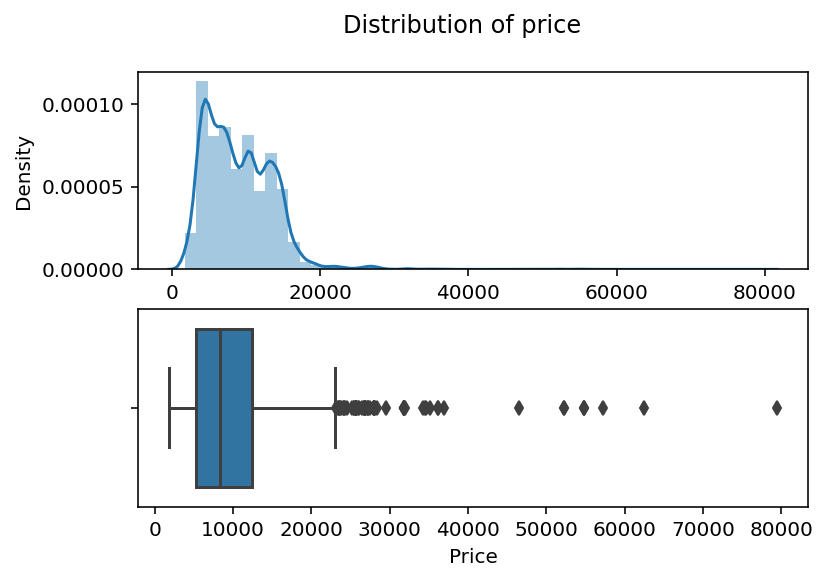

In [35]:
fig, (arr1, arr2) = plt.subplots(2)
fig.suptitle('Distribution of price')
sns.distplot(train_data['Price'],ax=arr1)
sns.boxplot(train_data['Price'],ax=arr2)

In [36]:
train_data['Price']=np.where(train_data['Price'] > 40000,train_data['Price'].median(),train_data['Price'])

In [37]:
#Price Distribution Across Airlines

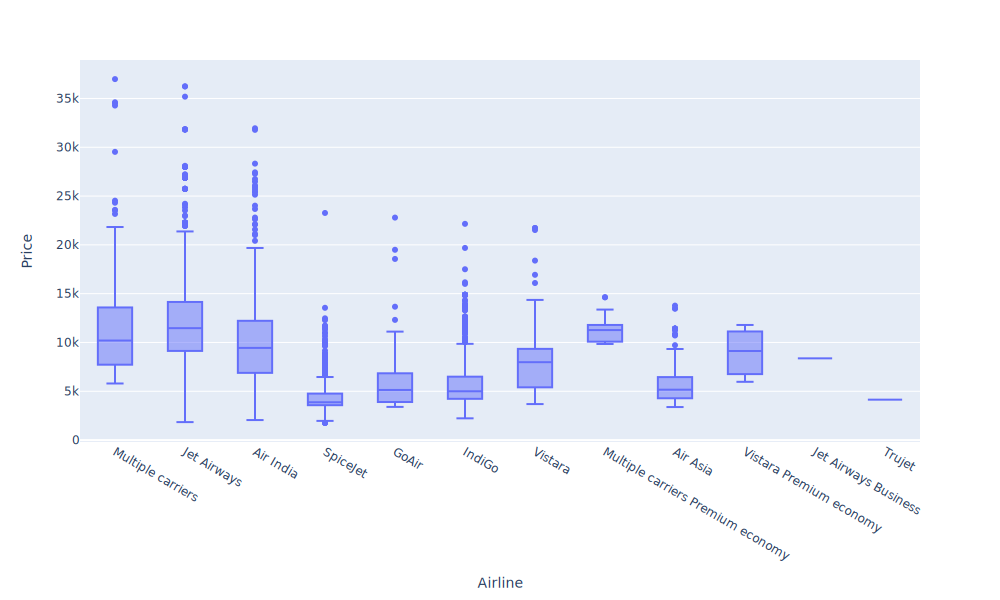

In [38]:
fig = px.box(train_data.sort_values(by=["Price"], ascending = False), x="Airline", y="Price",width=1000, height=600)
fig.show(renderer="svg")

In [39]:
#jet airways has the highest median price of tickets and spicejet has the lowest. But the median prices don't differ
#by a large amount

In [40]:
#flight prices by source and destination

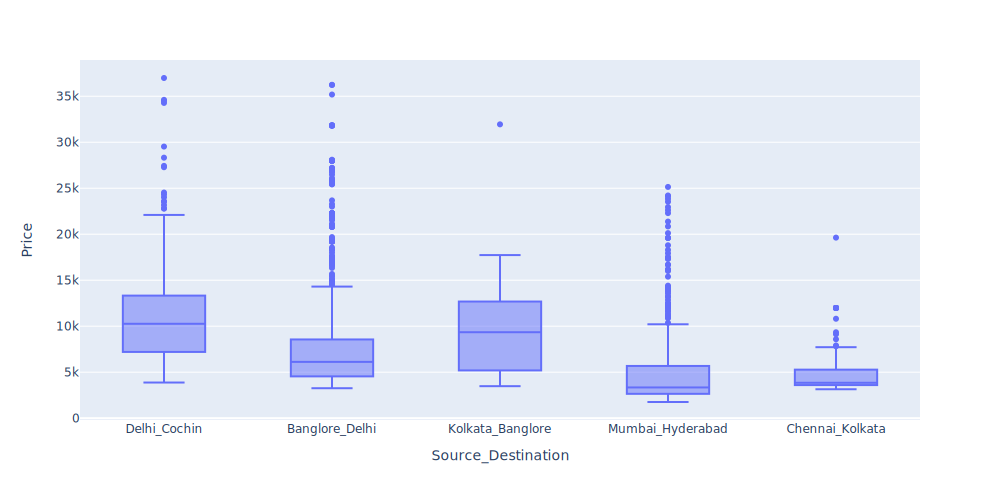

In [41]:
train_data['Source_Destination']=train_data['Source']+"_"+train_data['Destination']
fig = px.box(train_data.sort_values(by=["Price"], ascending = False), x="Source_Destination", y="Price",width=1000, height=500)
fig.show(renderer="svg")
train_data.drop(['Source_Destination'], axis = 1, inplace = True)

In [42]:
#Delhi to Cochin costs more due to larger distance travelled.

In [43]:
#flight prices by number of stops

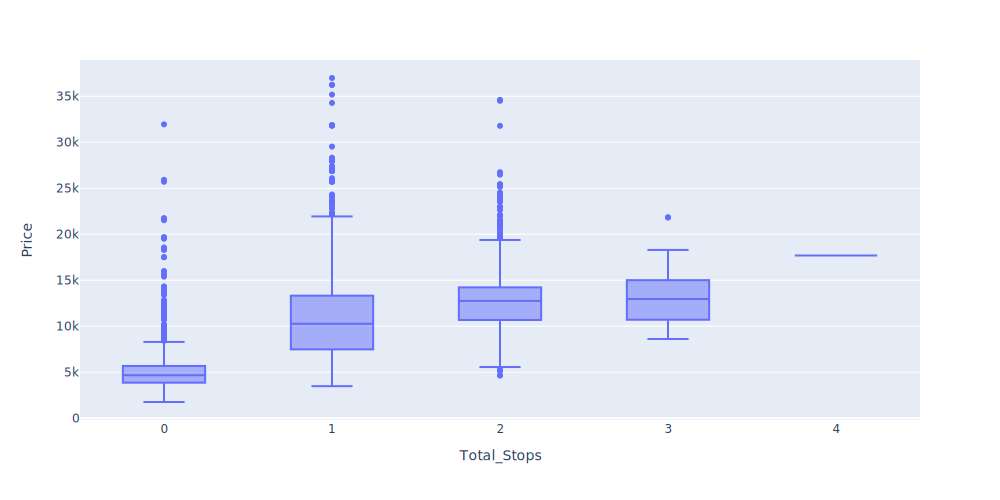

In [44]:
fig = px.box(train_data, x="Total_Stops", y="Price",width=1000, height=500)
fig.show(renderer="svg")

In [45]:
#the median prices of tickets increases with an increase in the no. of stops

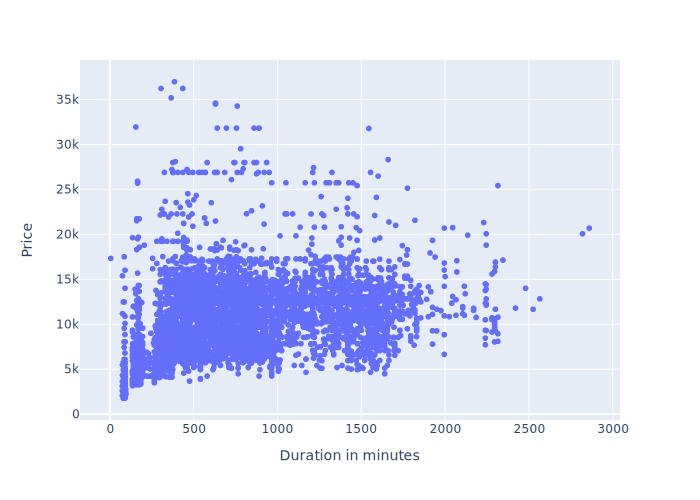

In [46]:
fig = px.scatter(x=train_data['Duration'],y=train_data['Price'])
fig.update_xaxes(title_text='Duration in minutes')
fig.update_yaxes(title_text='Price')
fig.show(renderer="svg")

In [47]:
#linear relation exists between duration and price

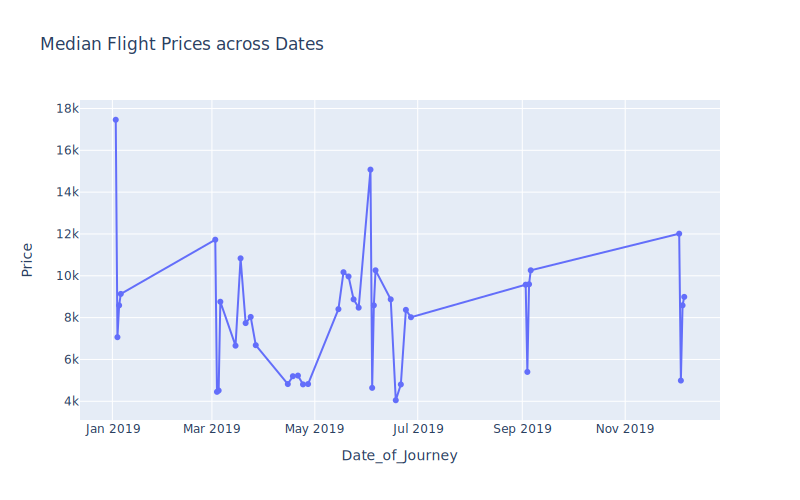

In [48]:
df = train_data.groupby(by=['Date_of_Journey'])['Price'].median()
df = df.to_frame()
df.reset_index(inplace = True)
fig = px.line(df, x="Date_of_Journey", y="Price", title='Median Flight Prices across Dates',markers=True, width=800, height=500)
fig.show(renderer="svg")

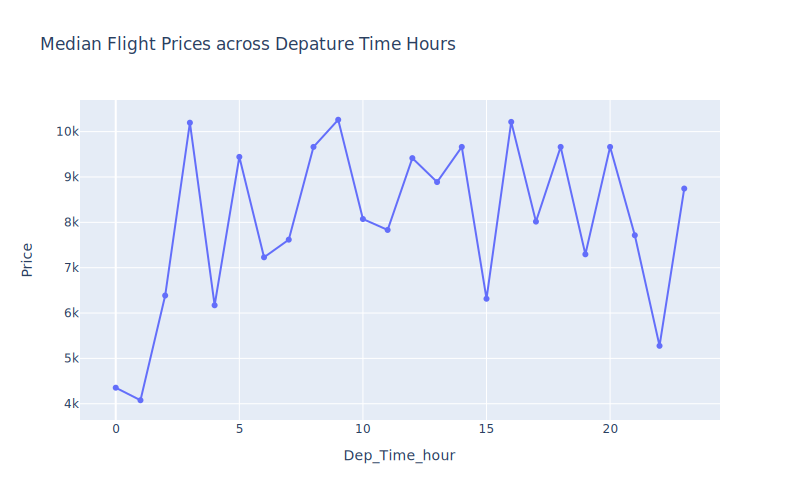

In [49]:
df = train_data.groupby(by=['Dep_Time_hour'])['Price'].median()
df = df.to_frame()
df.reset_index(inplace = True)
fig = px.line(df, x="Dep_Time_hour", y="Price", title='Median Flight Prices across Depature Time Hours',markers=True, width=800, height=500)
fig.show(renderer="svg")

In [50]:
#median prices tend to lower for flights departing around midnight

In [51]:
#one hot encoding for categorical features 

In [52]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Route_1,Route_2,Route_3,Route_4
0,IndiGo,2019-03-24,Banglore,Delhi,170,0,No info,3897.0,24,3,22,20,1,10,BLR,DEL,None,None
1,Air India,2019-01-05,Kolkata,Banglore,445,2,No info,7662.0,5,1,5,50,13,15,CCU,IXR,BBI,BLR
2,Jet Airways,2019-09-06,Delhi,Cochin,1140,2,No info,13882.0,6,9,9,25,4,25,DEL,LKO,BOM,COK
3,IndiGo,2019-12-05,Kolkata,Banglore,325,1,No info,6218.0,5,12,18,5,23,30,CCU,NAG,BLR,None
4,IndiGo,2019-01-03,Banglore,Delhi,285,1,No info,13302.0,3,1,16,50,21,35,BLR,NAG,DEL,None


In [53]:
cat_col = [col for col in train_data if train_data[col].dtype=='object']
cat_col

['Airline',
 'Source',
 'Destination',
 'Additional_Info',
 'Route_1',
 'Route_2',
 'Route_3',
 'Route_4']

In [54]:
def feature_count(col):
    print("{} feature has {} categories".format(col, train_data[col].nunique()))

In [55]:
for col in cat_col:
    feature_count(col)

Airline feature has 12 categories
Source feature has 5 categories
Destination feature has 5 categories
Additional_Info feature has 9 categories
Route_1 feature has 5 categories
Route_2 feature has 40 categories
Route_3 feature has 27 categories
Route_4 feature has 12 categories


In [56]:
def one_got_encoding(df, col):
    x =  pd.get_dummies(df[col], drop_first= True)
    x.columns = [col+"_"+y for y in x.columns]
    return x

In [57]:
airlines_data = one_got_encoding(train_data, "Airline")
source_data = one_got_encoding(train_data, "Source")
destination_data = one_got_encoding(train_data, "Destination")

In [58]:
train_data = pd.concat([airlines_data,source_data,destination_data, train_data], axis = 1)
train_data.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,...,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Route_1,Route_2,Route_3,Route_4
0,0,0,1,0,0,0,0,0,0,0,...,24,3,22,20,1,10,BLR,DEL,None,None
1,1,0,0,0,0,0,0,0,0,0,...,5,1,5,50,13,15,CCU,IXR,BBI,BLR
2,0,0,0,1,0,0,0,0,0,0,...,6,9,9,25,4,25,DEL,LKO,BOM,COK
3,0,0,1,0,0,0,0,0,0,0,...,5,12,18,5,23,30,CCU,NAG,BLR,None
4,0,0,1,0,0,0,0,0,0,0,...,3,1,16,50,21,35,BLR,NAG,DEL,None


In [59]:
train_data.drop(columns=['Airline','Source','Destination'], inplace= True)
train_data.columns

Index(['Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Date_of_Journey', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_day', 'Journey_month',
       'Dep_Time_hour', 'Dep_Time_minute', 'Arrival_Time_hour',
       'Arrival_Time_minute', 'Route_1', 'Route_2', 'Route_3', 'Route_4'],
      dtype='object')

In [60]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for i in ['Route_1','Route_2','Route_3','Route_4']:
    train_data[i] = le.fit_transform(train_data[i])

In [61]:
train_data

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,...,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Route_1,Route_2,Route_3,Route_4
0,0,0,1,0,0,0,0,0,0,0,...,24,3,22,20,1,10,0,10,21,10
1,1,0,0,0,0,0,0,0,0,0,...,5,1,5,50,13,15,2,20,1,3
2,0,0,0,1,0,0,0,0,0,0,...,6,9,9,25,4,25,3,27,4,5
3,0,0,1,0,0,0,0,0,0,0,...,5,12,18,5,23,30,2,29,3,10
4,0,0,1,0,0,0,0,0,0,0,...,3,1,16,50,21,35,0,29,7,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,...,4,9,19,55,22,25,2,5,21,10
10679,1,0,0,0,0,0,0,0,0,0,...,27,4,20,45,23,20,2,5,21,10
10680,0,0,0,1,0,0,0,0,0,0,...,27,4,8,20,11,20,0,10,21,10
10681,0,0,0,0,0,0,0,0,0,1,...,3,1,11,30,14,10,0,10,21,10


In [62]:
y = train_data['Price']
x = train_data.drop(columns=['Price','Date_of_Journey','Additional_Info'])

In [63]:
x.dtypes

Airline_Air India                            uint8
Airline_GoAir                                uint8
Airline_IndiGo                               uint8
Airline_Jet Airways                          uint8
Airline_Jet Airways Business                 uint8
Airline_Multiple carriers                    uint8
Airline_Multiple carriers Premium economy    uint8
Airline_SpiceJet                             uint8
Airline_Trujet                               uint8
Airline_Vistara                              uint8
Airline_Vistara Premium economy              uint8
Source_Chennai                               uint8
Source_Delhi                                 uint8
Source_Kolkata                               uint8
Source_Mumbai                                uint8
Destination_Cochin                           uint8
Destination_Delhi                            uint8
Destination_Hyderabad                        uint8
Destination_Kolkata                          uint8
Duration                       

In [64]:
#feature selection for training 

In [65]:
from sklearn.feature_selection import mutual_info_regression 
mutual_info_regression(x,y)
inf=pd.DataFrame(mutual_info_regression(x,y),index=x.columns)
inf.columns = ['information']
inf.sort_values(by='information',ascending = False)

,information
Route_1,0.947100
Route_2,0.897050
Total_Stops,0.786208
Route_3,0.560300
Airline_Jet Airways,0.541335
Source_Delhi,0.519460
Destination_Cochin,0.517941
Duration,0.494786
Source_Kolkata,0.458801
Arrival_Time_hour,0.403067


In [66]:
x.drop(columns=['Airline_Trujet','Airline_Multiple carriers Premium economy','Airline_Vistara Premium economy','Airline_Jet Airways Business'], axis=1, inplace=True)

In [67]:
#train_test_split 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [68]:
#machine learning models

In [69]:
from sklearn import metrics
def model_predict(model):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    r2_score = metrics.r2_score(y_test,y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    print("The coefficient of determination is: ",r2_score)
    print("The mean square error is: ", mse)
    print("The root mean square error is: ", rmse)
    sns.distplot(y_pred-y_test)

In [70]:
#linear regression

The coefficient of determination is:  0.58321666858605
The mean square error is:  8535627.241595935
The root mean square error is:  2921.579579884131


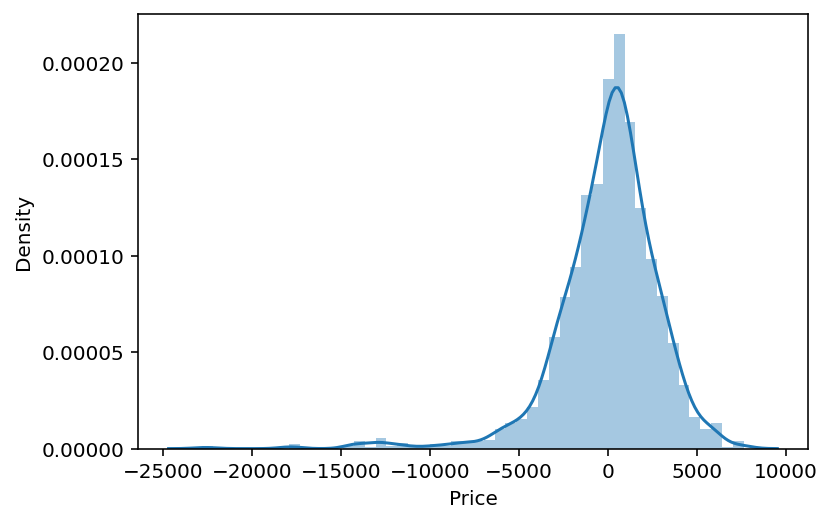

In [71]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model_predict(lr)

In [72]:
#random forest regressor

The coefficient of determination is:  0.8253822627349984
The mean square error is:  3576131.2958666524
The root mean square error is:  1891.0661796633804


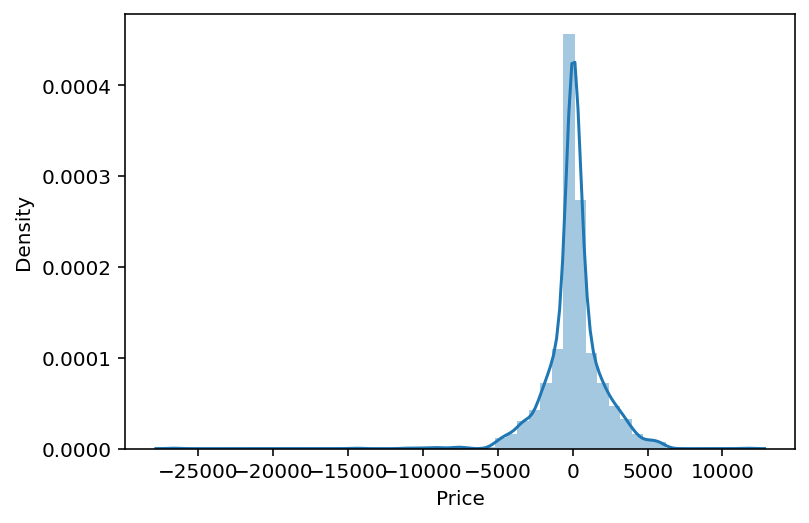

In [73]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=0)
model_predict(rfr)

In [74]:
#KNN regressor

In [75]:
x.columns

Index(['Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Multiple carriers', 'Airline_SpiceJet',
       'Airline_Vistara', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Cochin', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_Kolkata', 'Duration',
       'Total_Stops', 'Journey_day', 'Journey_month', 'Dep_Time_hour',
       'Dep_Time_minute', 'Arrival_Time_hour', 'Arrival_Time_minute',
       'Route_1', 'Route_2', 'Route_3', 'Route_4'],
      dtype='object')

The coefficient of determination is:  0.7454640905230394
The mean square error is:  5212837.172554984
The root mean square error is:  2283.16385144715


<AxesSubplot:xlabel='Price', ylabel='Density'>

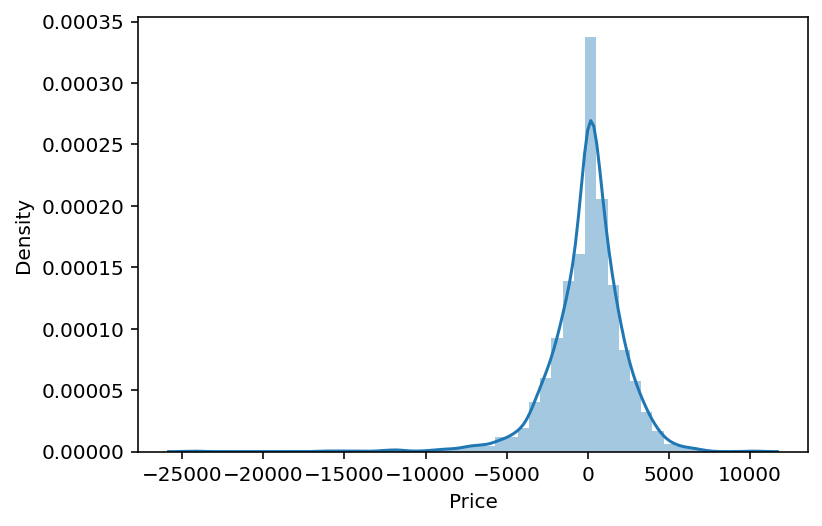

In [76]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(x_train_scaled,y_train)

y_pred = knn.predict(x_test_scaled)
r2_score = metrics.r2_score(y_test,y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
    
print("The coefficient of determination is: ",r2_score)
print("The mean square error is: ", mse)
print("The root mean square error is: ", rmse)
sns.distplot(y_pred-y_test)


In [77]:
#highest coefficient of determination is for random forest regressor. We will do hyperparameter tuning for random 
#forest regressor model

In [78]:
#random forest regressor hyperparameter tuning

In [79]:
rfr.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [80]:
n_estimators = [int(x) for x in np.linspace(start=100, stop=1100, num = 5)]
max_depth = [int(x) for x in np.linspace(start=5, stop = 25, num = 5)]

In [81]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestRegressor(random_state=0)
params = {
    "max_depth" : max_depth,
    "min_samples_split" : [2, 5, 8, 10],
    "n_estimators" : n_estimators
}
forest_grid=GridSearchCV(estimator = rf, param_grid = params, cv = 3, verbose = 2)

In [82]:
forest_grid.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END .max_depth=5, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=350; total time=   2.2s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=350; total time=   2.3s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=350; total time=   2.5s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=600; total time=   4.7s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=600; total time=   6.7s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=600; total time=   5.0s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=850; total time=  12.5s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=850; total time=   8.4s
[CV] END .max_depth=5, min_samples_split=2, n_

[CV] END max_depth=10, min_samples_split=8, n_estimators=850; total time=  11.5s
[CV] END max_depth=10, min_samples_split=8, n_estimators=1100; total time=  12.6s
[CV] END max_depth=10, min_samples_split=8, n_estimators=1100; total time=  15.2s
[CV] END max_depth=10, min_samples_split=8, n_estimators=1100; total time=  16.9s
[CV] END max_depth=10, min_samples_split=10, n_estimators=100; total time=   1.6s
[CV] END max_depth=10, min_samples_split=10, n_estimators=100; total time=   1.5s
[CV] END max_depth=10, min_samples_split=10, n_estimators=100; total time=   1.6s
[CV] END max_depth=10, min_samples_split=10, n_estimators=350; total time=   5.2s
[CV] END max_depth=10, min_samples_split=10, n_estimators=350; total time=   5.3s
[CV] END max_depth=10, min_samples_split=10, n_estimators=350; total time=   5.8s
[CV] END max_depth=10, min_samples_split=10, n_estimators=600; total time=   9.4s
[CV] END max_depth=10, min_samples_split=10, n_estimators=600; total time=   9.1s
[CV] END max_dept

[CV] END max_depth=20, min_samples_split=5, n_estimators=600; total time=  10.5s
[CV] END max_depth=20, min_samples_split=5, n_estimators=600; total time=   9.8s
[CV] END max_depth=20, min_samples_split=5, n_estimators=850; total time=  14.5s
[CV] END max_depth=20, min_samples_split=5, n_estimators=850; total time=  16.4s
[CV] END max_depth=20, min_samples_split=5, n_estimators=850; total time=  18.1s
[CV] END max_depth=20, min_samples_split=5, n_estimators=1100; total time=  21.3s
[CV] END max_depth=20, min_samples_split=5, n_estimators=1100; total time=  27.1s
[CV] END max_depth=20, min_samples_split=5, n_estimators=1100; total time=  39.8s
[CV] END max_depth=20, min_samples_split=8, n_estimators=100; total time=   2.0s
[CV] END max_depth=20, min_samples_split=8, n_estimators=100; total time=   2.1s
[CV] END max_depth=20, min_samples_split=8, n_estimators=100; total time=   2.6s
[CV] END max_depth=20, min_samples_split=8, n_estimators=350; total time=  14.3s
[CV] END max_depth=20, mi

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [5, 10, 15, 20, 25],
                         'min_samples_split': [2, 5, 8, 10],
                         'n_estimators': [100, 350, 600, 850, 1100]},
             verbose=2)

In [85]:
params

{'max_depth': [5, 10, 15, 20, 25],
 'min_samples_split': [2, 5, 8, 10],
 'n_estimators': [100, 350, 600, 850, 1100]}

In [86]:
forest_grid.best_params_

{'max_depth': 15, 'min_samples_split': 10, 'n_estimators': 1100}

In [87]:
forest_grid.best_score_

0.8295963837132622

In [89]:
y_pred2 = forest_grid.predict(x_test)

The coefficient of determination is:  0.8493759799012075
The mean square error is:  3084745.4595467425
The root mean square error is:  1756.3443453795564


<AxesSubplot:xlabel='Price', ylabel='Density'>

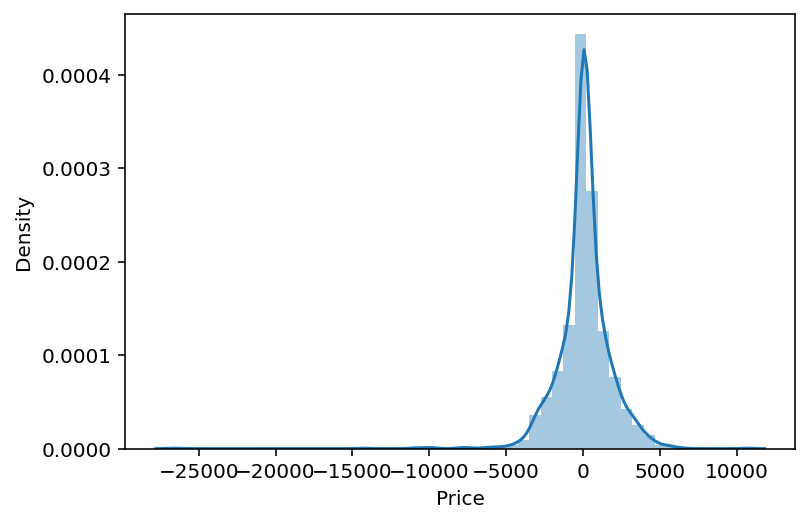

In [90]:
r2_score = metrics.r2_score(y_test,y_pred2)
mse = metrics.mean_squared_error(y_test, y_pred2)
rmse = np.sqrt(mse)
print("The coefficient of determination is: ",r2_score)
print("The mean square error is: ", mse)
print("The root mean square error is: ", rmse)
sns.distplot(y_pred2-y_test)